<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [28]:
!kaggle datasets download -d camnugent/sandp500

Dataset URL: https://www.kaggle.com/datasets/camnugent/sandp500
License(s): CC0-1.0
 26% 5.00M/19.3M [00:00<00:00, 22.7MB/s]
100% 19.3M/19.3M [00:00<00:00, 64.3MB/s]


In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500,AMAZON
2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400,AMAZON
2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900,AMAZON
2024-06-18,183.740005,184.289993,181.429993,182.809998,182.809998,36659200,AMAZON
2024-06-20,182.910004,186.509995,182.720001,186.100006,186.100006,44726800,AMAZON
2024-06-21,187.800003,189.279999,185.860001,189.080002,189.080002,72931800,AMAZON
2024-06-24,189.330002,191.000000,185.330002,185.570007,185.570007,50610400,AMAZON
2024-06-25,186.809998,188.839996,185.419998,186.339996,186.339996,45898500,AMAZON
2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900,AMAZON


#Information About the Data

In [31]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,183.998333,185.580953,182.554682,184.079326,183.598478,6.023443e+07
std,10.636369,10.771970,10.533617,10.641832,10.668689,2.479802e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801846,4.674302e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.353515e+07
75%,191.410004,192.419998,189.977501,191.314999,190.906506,6.615335e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.464214e+08


In [32]:
# Summary Stats
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-28 to 2024-06-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


#Closing Price

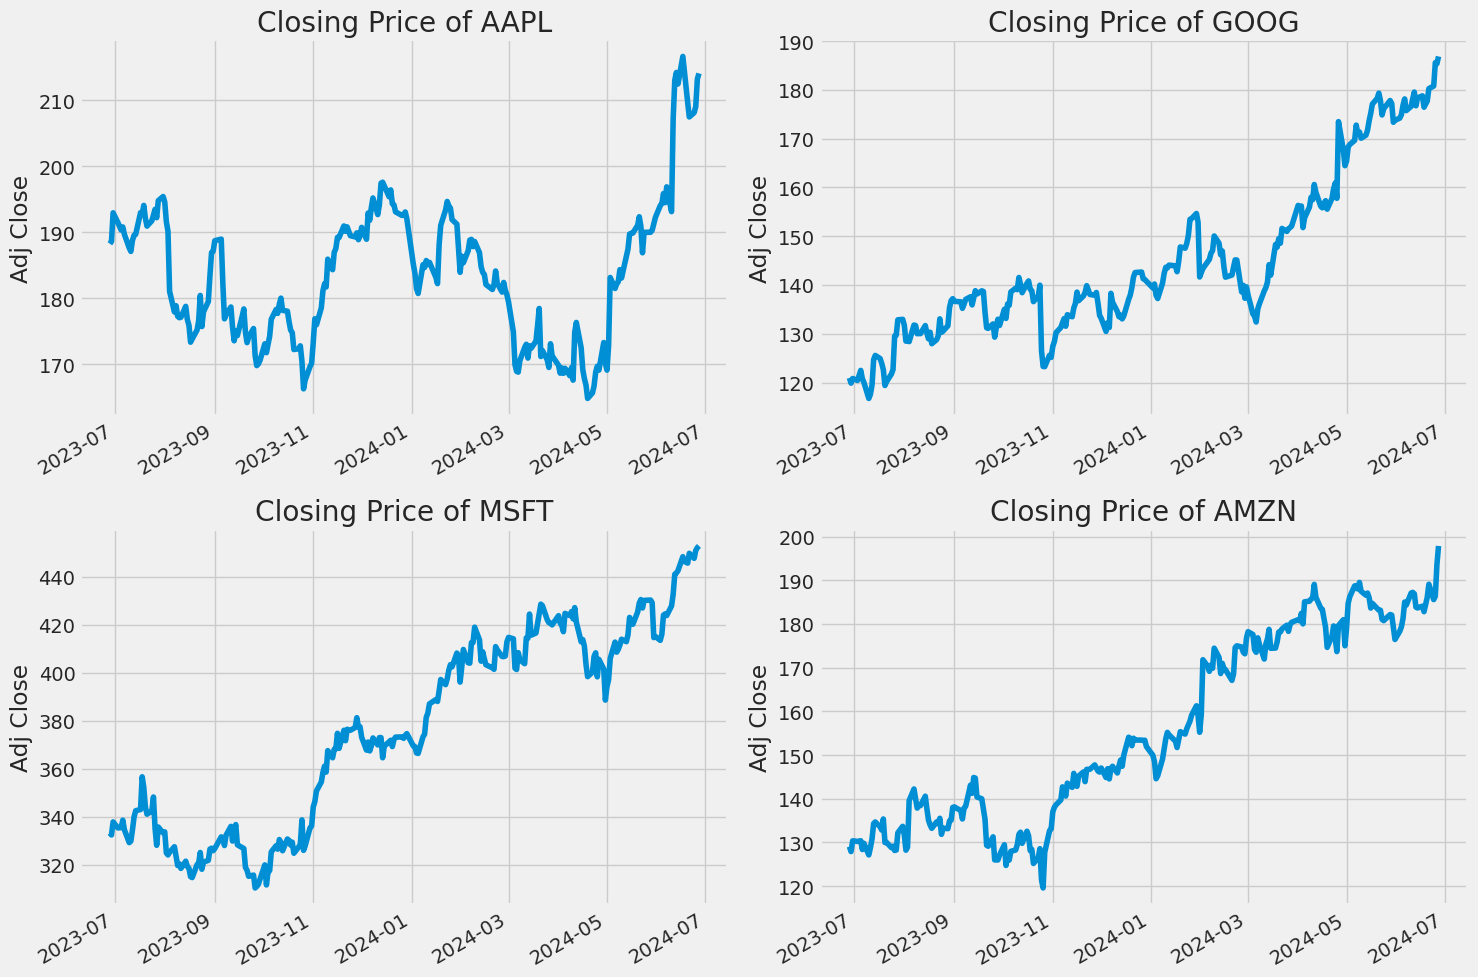

In [33]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


#Volume of Sales

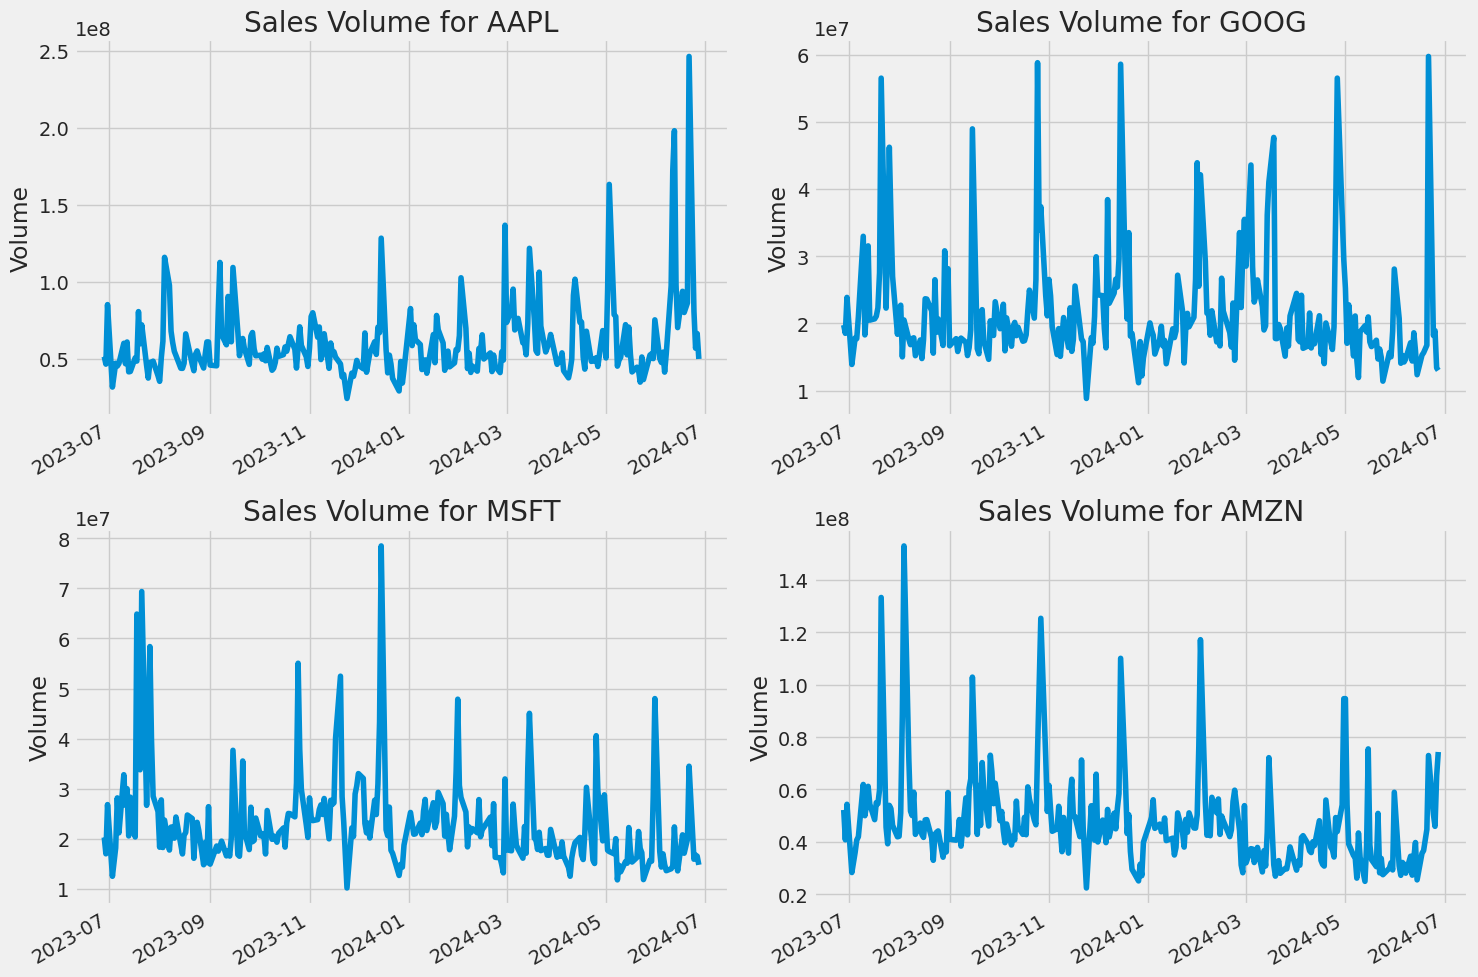

In [34]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

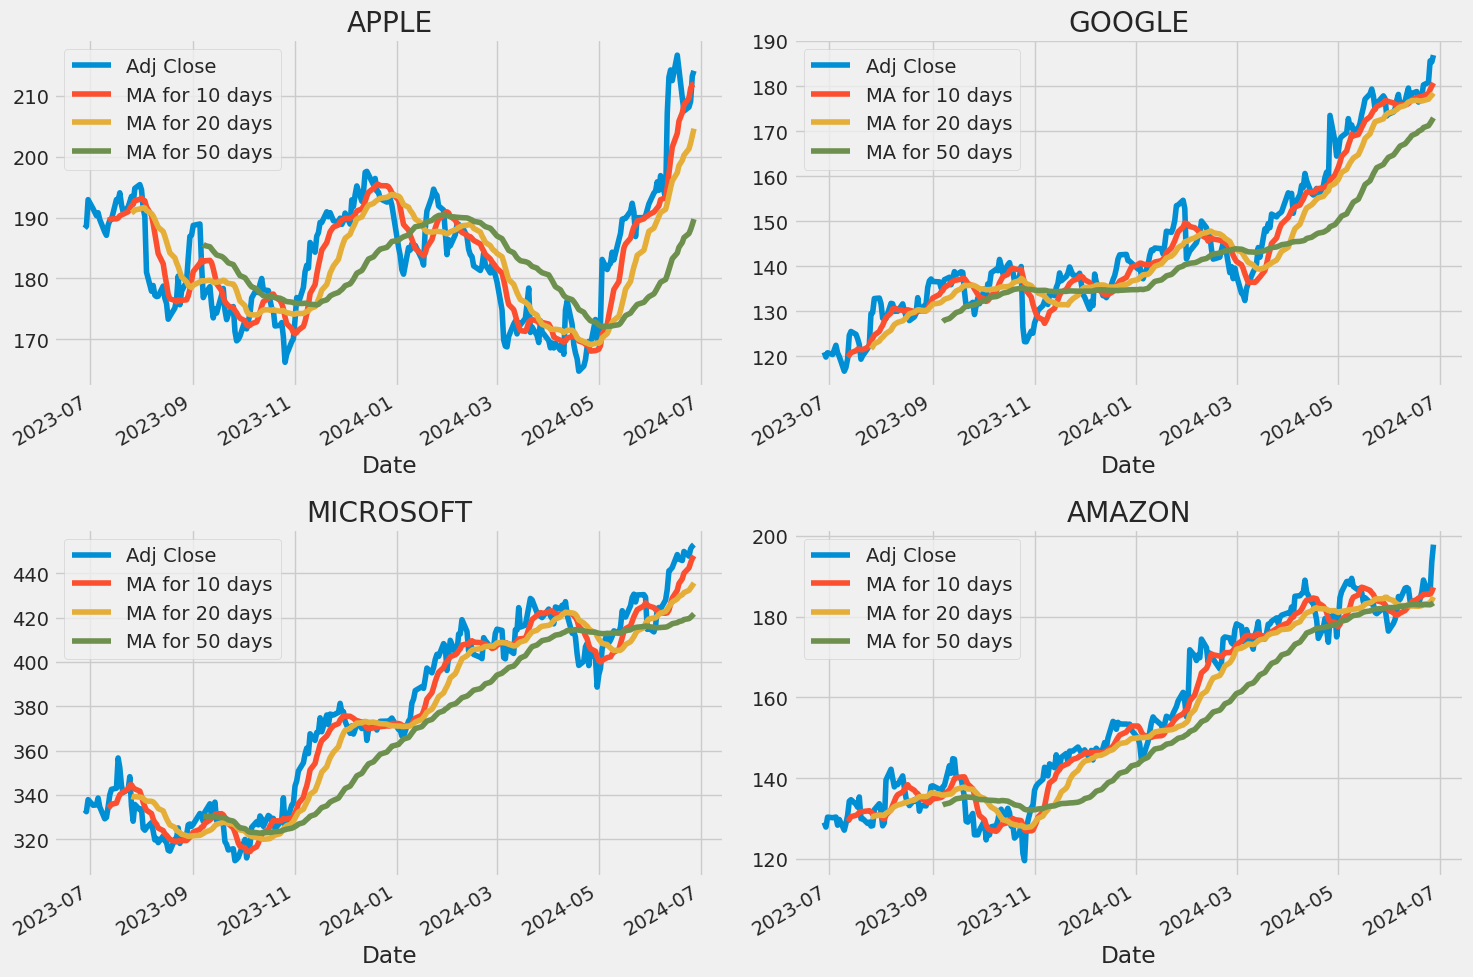

In [36]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


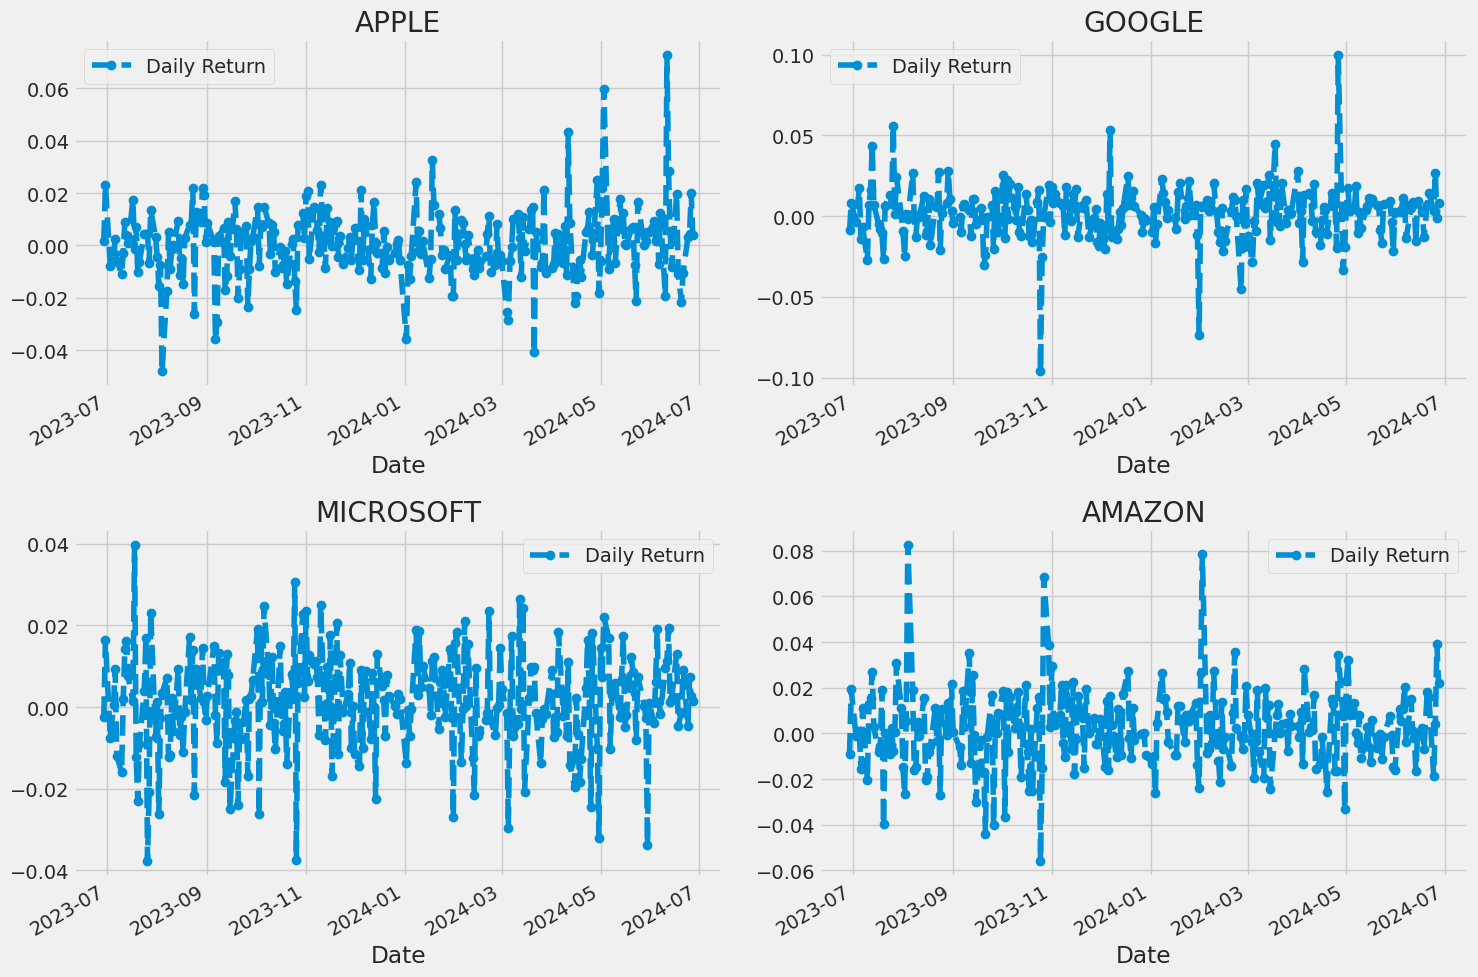

In [38]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


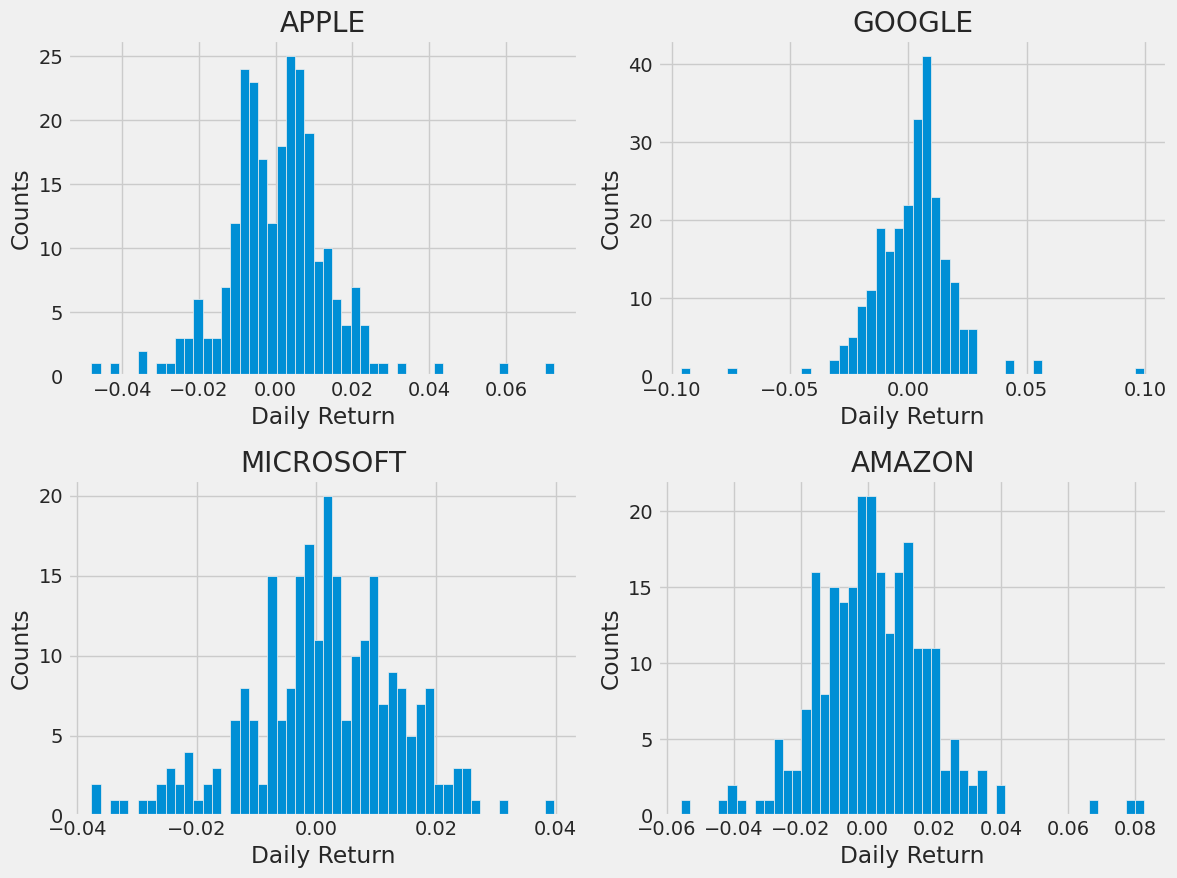

In [39]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [40]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-28,NaN,NaN,NaN,NaN
2023-06-29,0.001797,-0.008834,-0.008837,-0.002382
2023-06-30,0.023103,0.019234,0.007999,0.016386
2023-07-03,-0.007785,-0.001074,-0.003389,-0.007488
2023-07-05,-0.005871,0.001229,0.017170,0.000473


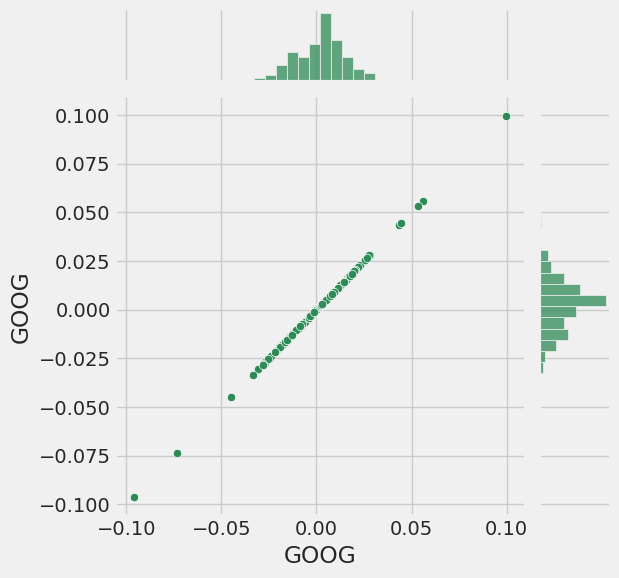

In [41]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

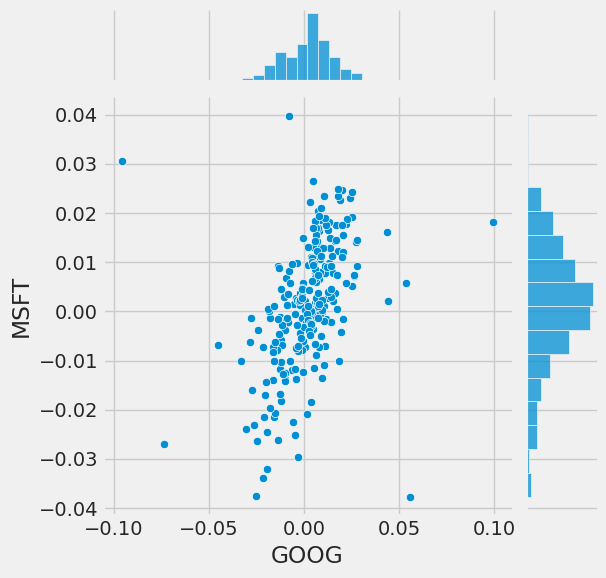

In [42]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

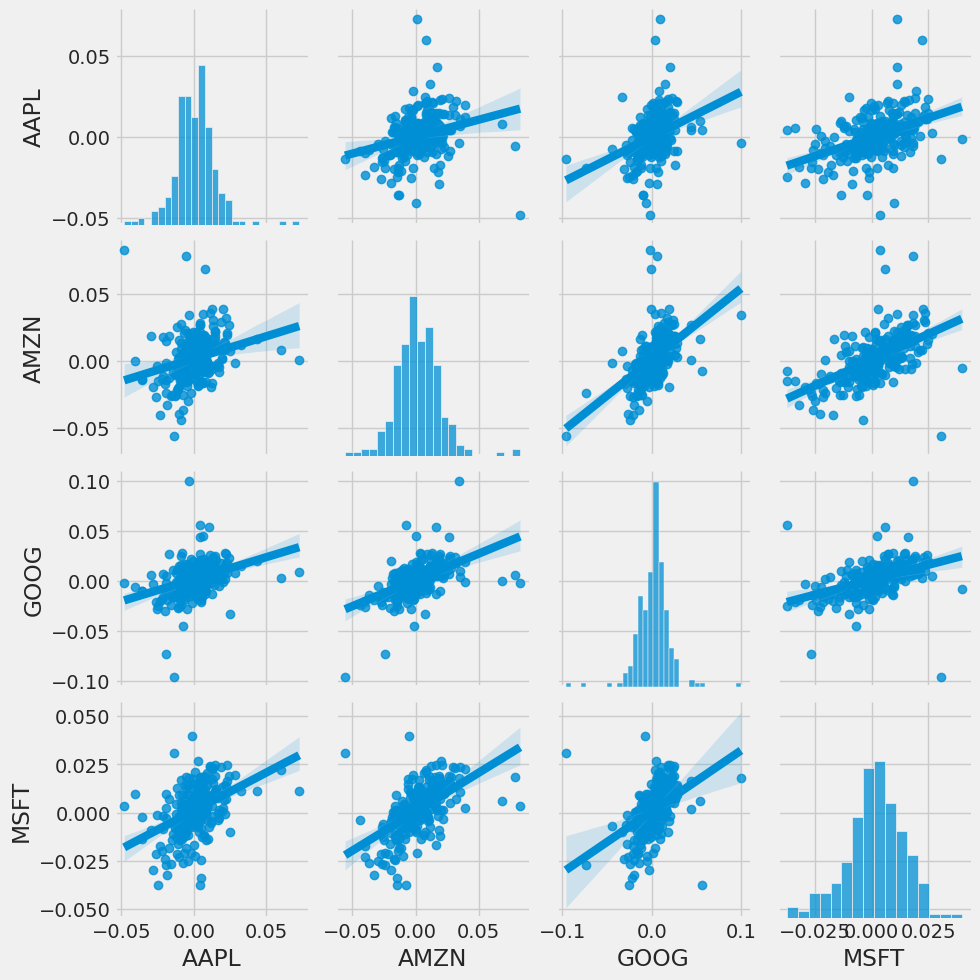

In [46]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

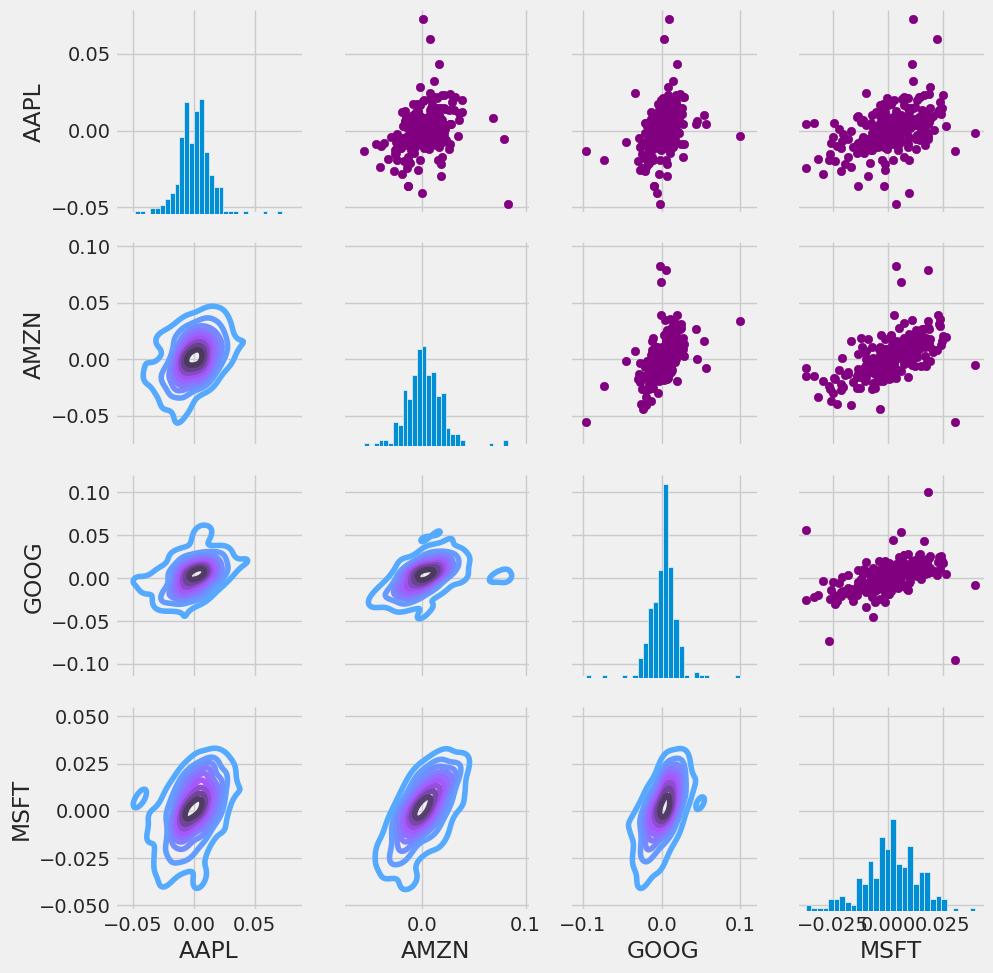

In [45]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


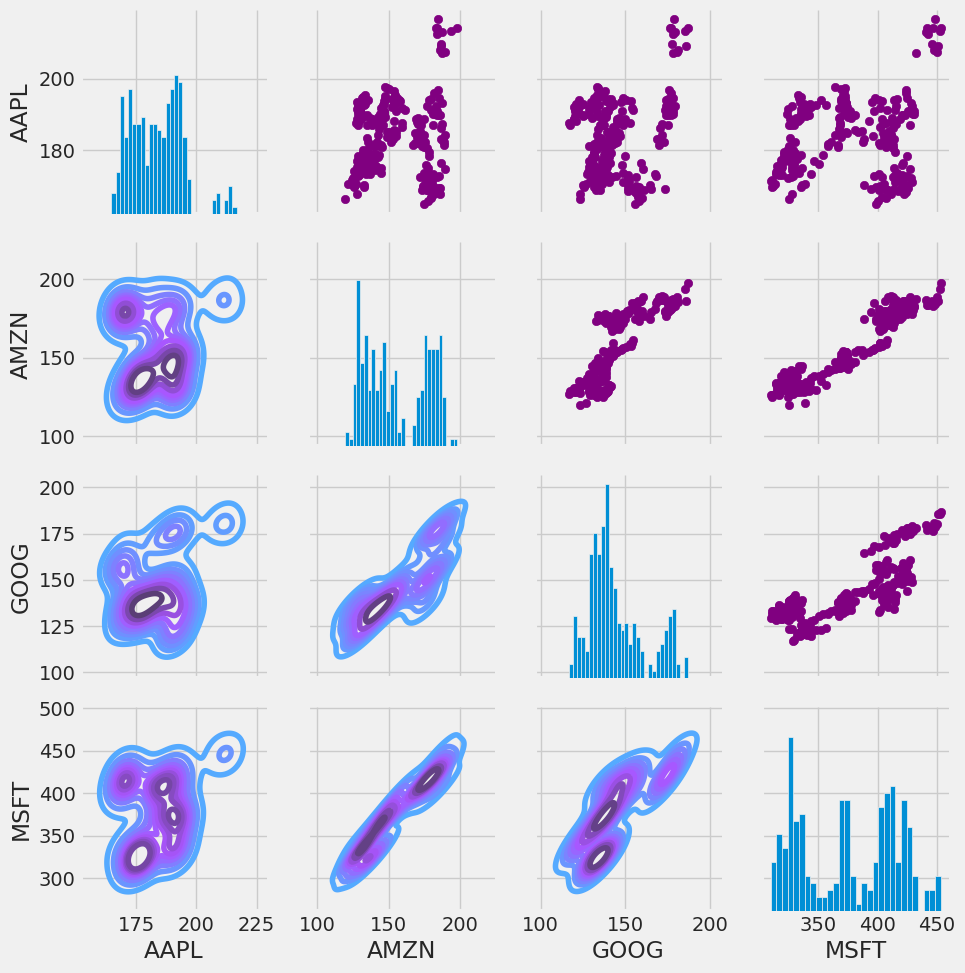

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

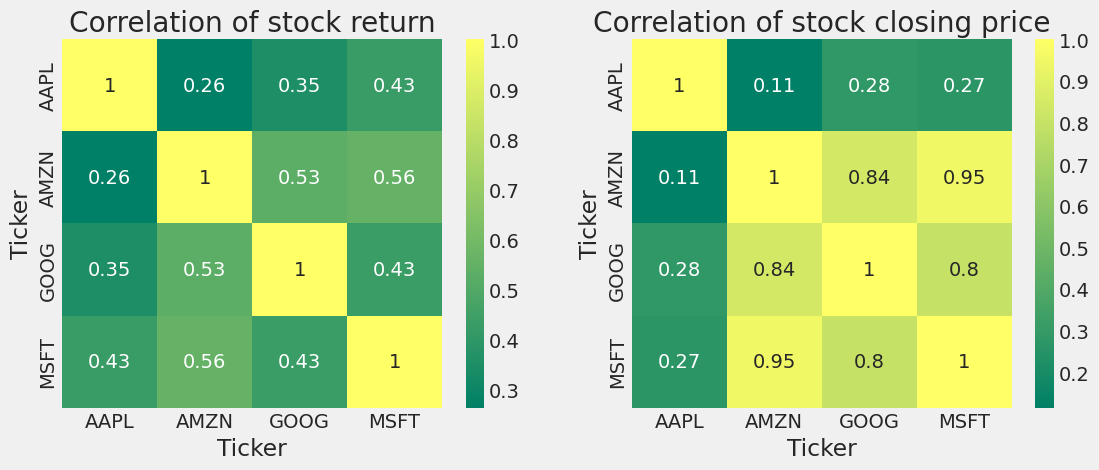

In [48]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')


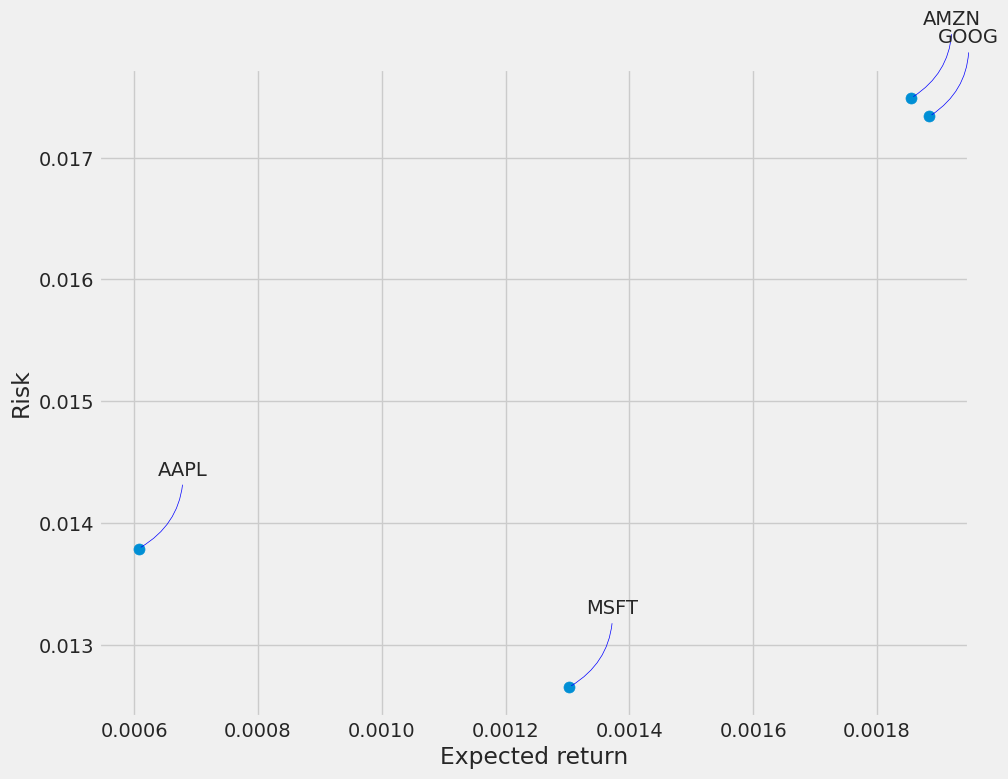

In [49]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


#Predicting the closing price stock price of APPLE inc:¶

In [50]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483711,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900


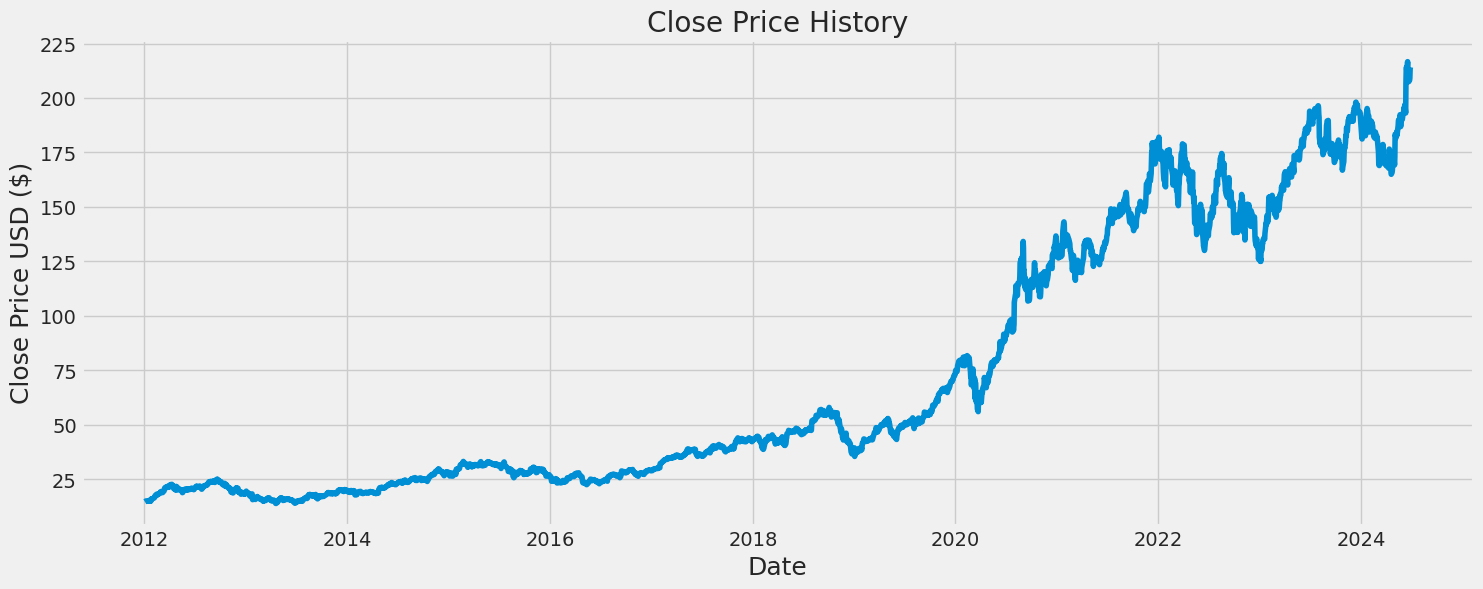

In [51]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [52]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2984

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00364679],
       [0.00403613],
       [0.00484476],
       ...,
       [0.96251037],
       [0.98312966],
       [0.98732261]])

#Train and Test Split

In [54]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00524467, 0.00649727, 0.00526406,
       0.0098886 , 0.00953098, 0.00999783, 0.0110073 , 0.01161862,
       0.01156753, 0.01137903, 0.01218238, 0.01293816, 0.01379437,
       0.01517733, 0.01808242, 0.01812647, 0.01974374, 0.02095228,
       0.01887521, 0.01967503, 0.01965918, 0.02190186, 0.02158299,
       0.02217316, 0.02323373, 0.02382391, 0.02552398, 0.02676248,
       0.02712011, 0.0272452 , 0.0251276 , 0.02461669, 0.02469245,
       0.02668321, 0.02724344, 0.0284467 , 0.03128309, 0.03506729,
       0.03435907, 0.03436083, 0.03709681, 0.03795301, 0.03734344,
       0.03678674, 0.03620713, 0.0381327 , 0.03945401, 0.04000719])]
[0.03864008132174998]

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2924/2924 [==============================] - 208s 70ms/step - loss: 0.0011


In [56]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 66ms/step


5.309356910896536

<ipython-input-57-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


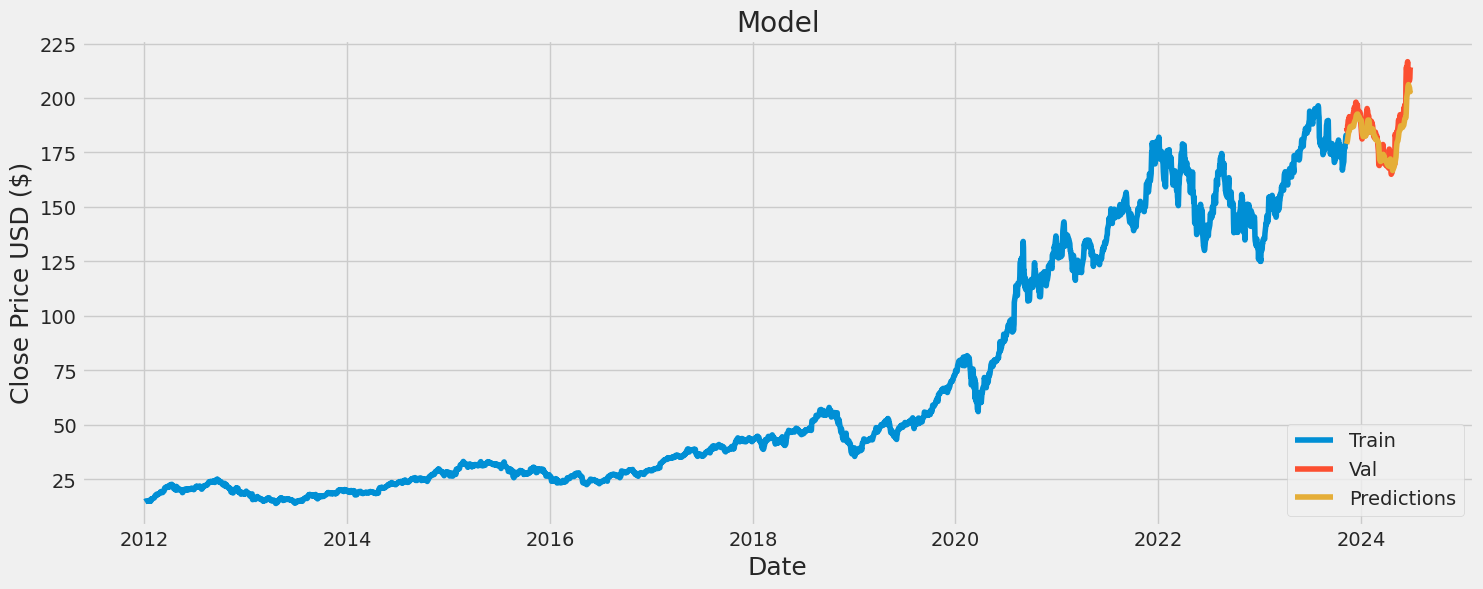

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-11-10,186.399994,178.942749
2023-11-13,184.800003,180.312302
2023-11-14,187.440002,181.172668
2023-11-15,188.009995,182.173096
2023-11-16,189.710007,183.092880
...,...,...
2024-06-21,207.490005,205.803253
2024-06-24,208.139999,204.614075
2024-06-25,209.070007,203.525742


from matplotlib import pyplot as plt
valid['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

Another dataset which done randomforestclassifier

In [3]:
!kaggle datasets download -d luisandresgarcia/stock-market-prediction

Dataset URL: https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 80% 33.0M/41.5M [00:00<00:00, 155MB/s] 
100% 41.5M/41.5M [00:00<00:00, 124MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  stock-market-prediction.zip
  inflating: infolimpioavanzadoTarget.csv  


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#load the dataset

In [6]:
df_stock = pd.read_csv('/content/infolimpioavanzadoTarget.csv')
df_stock.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [10]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [8]:
df_stock.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [9]:
df_stock.shape

(7781, 1285)

In [11]:
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

#Select features with that are highly correlated

In [12]:
data_new = df_stock[['date','open', 'high', 'low', 'close']]
data_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


In [13]:
data_new.isnull().sum()

date     0
open     0
high     0
low      0
close    0
dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

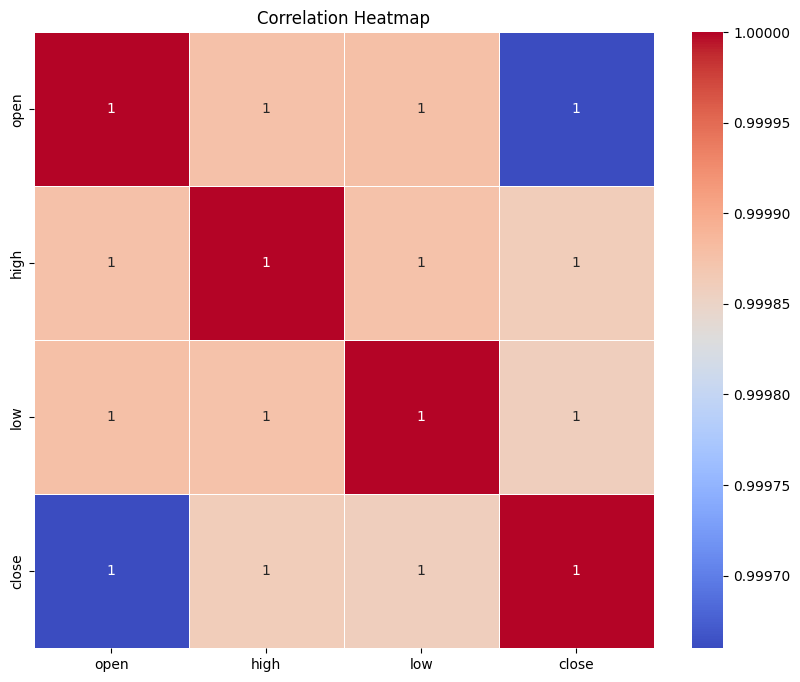

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix excluding the 'date' column
correlation_matrix = data_new[['open', 'high', 'low', 'close']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Line Plot of Stock Prices:

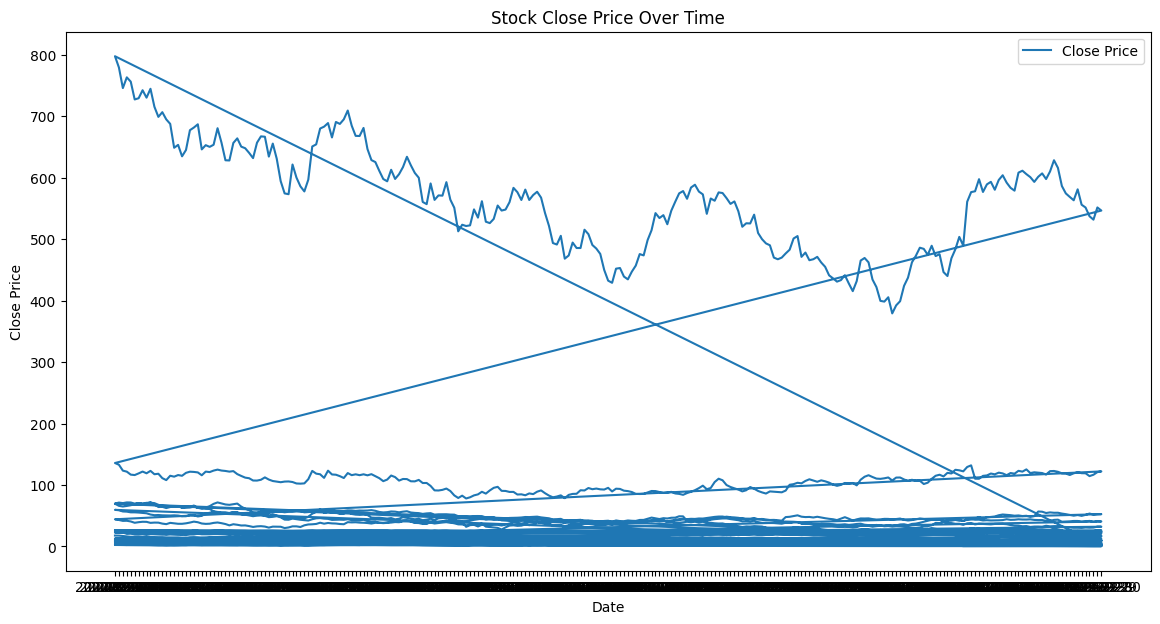

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data_new['date'], data_new['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()


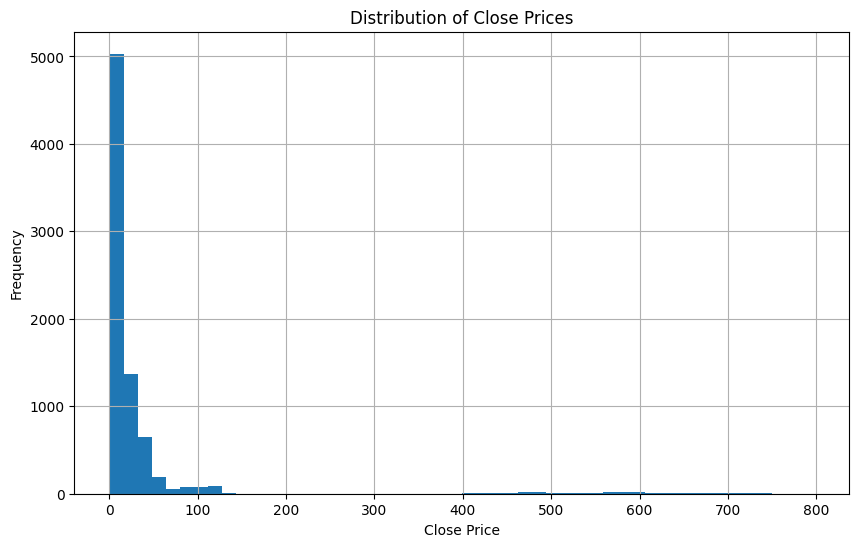

In [26]:
plt.figure(figsize=(10, 6))
data_new['close'].hist(bins=50)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Prices')
plt.show()


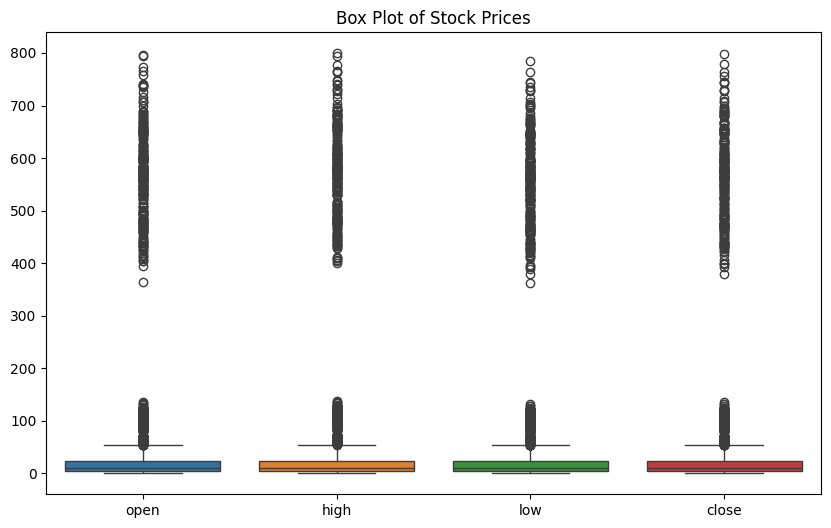

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_new[['open', 'high', 'low', 'close']])
plt.title('Box Plot of Stock Prices')
plt.show()


#Prepare Data for Machine Learning:
Adding another column to have the start stock value for the next day

In [17]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

<ipython-input-17-5314dd1e6995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["tomorrow"]= data_new["close"].shift(-1)


,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001


Create a target to return a boolean from the difference in stock value from previous day

In [18]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

<ipython-input-18-5425aff5bc51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)


,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001,False


#Train a RandomForestClassifier:
Import Machine learning library which has less tendency to overfit and can detect non linear patterns.

In [19]:
#For Decision Tree
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [20]:
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]


In [21]:
predictors = ["open", "high", "low", "close"] #Execpt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

#Evaluate Model:
Check level of accuracy with precision_score

In [22]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])


In [24]:
precision = precision_score(test["target"], pred)
precision


0.4090909090909091

In [23]:
pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])

In [ ]:
import pandas as pd
from datetime import datetime

# Function to predict the next day's stock movement
def predict_stock_movement(open_price, high_price, low_price, close_price):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'open': [open_price],
        'high': [high_price],
        'low': [low_price],
        'close': [close_price]
    })

    # Predict the target using the trained model
    prediction = model.predict(input_data)

    return prediction[0]  # Return True if the stock price is predicted to increase, otherwise False

# Example real-time input (Replace with actual real-time data)
open_price = 23.45
high_price = 23.75
low_price = 23.30
close_price = 23.60

# Predict whether the stock price will increase
result = predict_stock_movement(open_price, high_price, low_price, close_price)

# Output the prediction
if result:
    print("The stock price is predicted to increase.")
else:
    print("The stock price is predicted to decrease.")
